<a href="https://colab.research.google.com/github/pavankumarallada/nlp/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 93.0MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df.shape

(19820, 18)

In [ ]:
# OHE
df['make'].nunique(), df['model'].nunique()

(41, 3233)

In [ ]:
# target encoding
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
# make = {
#     'maruti' : 4.684721,
#     'hundayi': 5.458819
# }

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # numpy seed

In [ ]:
X_train.shape

(15856, 17)

In [ ]:
X_test.shape

(3964, 17)

In [ ]:
# sklearn # scikit learn
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5662,0.724138,0.021027,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4556,0.620690,0.025645,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7094,0.896552,0.019448,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1441,0.931034,0.003921,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
17079,0.551724,0.028922,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


# Univariate Linear Regression

In [ ]:
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # model creation
model.fit(X1_train, y_train) # model training

LinearRegression()

In [ ]:
# y = w*x + w0
model.coef_

array([0.99811371])

In [ ]:
model.intercept_

0.0013897655746198945

In [ ]:
# y = 0.99*x + 0.0013

In [ ]:
y_pred_train = model.predict(X1_train)

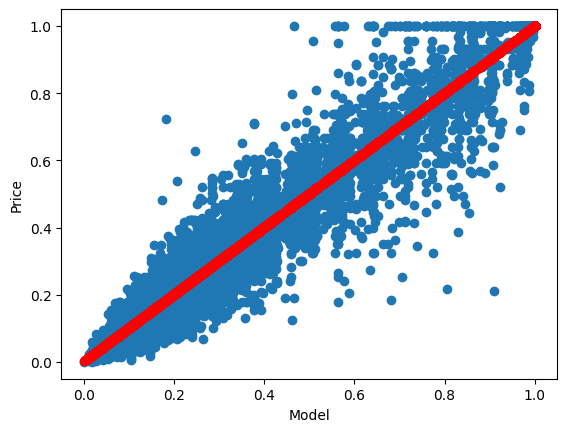

In [ ]:
plt.scatter(X1_train, y_train)
plt.scatter(X1_train, y_pred_train, color = 'red')
plt.xlabel("Model")
plt.ylabel("Price")
plt.show()

In [ ]:
# Evaluation Metrics
# - R2 score
# - MSE

In [ ]:
model

LinearRegression()

In [ ]:
model.score(X1_train, y_train)

0.9361429280197991

# Multivariate Linear Regression

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5662,0.724138,0.021027,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4556,0.620690,0.025645,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7094,0.896552,0.019448,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1441,0.931034,0.003921,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
17079,0.551724,0.028922,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
X_train.shape

(15856, 17)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # model creation
model.fit(X_train, y_train) # model training

LinearRegression()

In [ ]:
# w1.x1 + w2.x2 + ... + w17.x17 + w0
model.coef_

array([ 7.00246075e+11, -5.85876465e-01, -2.49021641e-01,  8.61322891e-02,
        3.35516137e-02,  7.00246075e+11,  6.77078479e-02,  8.57365170e-01,
       -5.84157735e-03, -8.01968772e-03,  5.91029056e-03,  1.23979307e-01,
        1.49517146e-02, -1.01015919e-02, -4.36280183e-03, -1.24902971e-02,
       -2.03421265e-02])

In [ ]:
model.intercept_

-700246074985.6368

In [ ]:
model.score(X_train, y_train)

0.9454992783493167

# Scratch Implementation

In [ ]:
class MyLinearRegression() :
    def __init__(self, learning_rate=0.01, iterations=20):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self, X):
        return np.dot(X, self.W) + self.w0


    def update_weights(self):
        Y_pred = self.predict( self.X )

        # calculate gradients
        B = self.X
        A = Y_pred - self.Y
        dW =  2* B.T.dot(A)/self.n

        dw0 =  2*np.sum(A)/self.n

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.w0 = self.w0 - self.learning_rate * dw0

        return self


    def fit(self, X, Y):
        # no_of_training_examples, no_of_features

        self.n, self.d = X.shape

        # weight initialization
        self.W = np.zeros((self.d, 1))
        self.w0 = 0
        self.X = X
        self.Y = Y
        self.error_list=[]

        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()

            Y_pred = self.predict(X)

            error = np.mean((Y-Y_pred)**2) # MSE

            self.error_list.append(error)

        return self


    def score(self, X, y):
        y_ = self.predict(X)

        ss_res = np.sum((y-y_)**2)
        ss_tot = np.sum((y- y.mean())**2)

        score = 1 - (ss_res/ss_tot)
        return score

In [ ]:
X_train.shape

(15856, 17)

In [ ]:
y_train.shape

(15856, 1)

In [ ]:
y_train = y_train.values.reshape(len(y_train), 1)
y_train.shape

In [ ]:
my_model = MyLinearRegression()
my_model.fit(X_train, y_train)

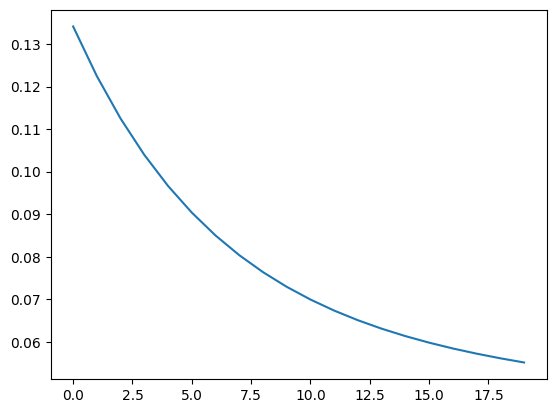

In [ ]:
plt.plot(my_model.error_list);

In [ ]:
my_model = MyLinearRegression(iterations=100)
my_model.fit(X_train, y_train)

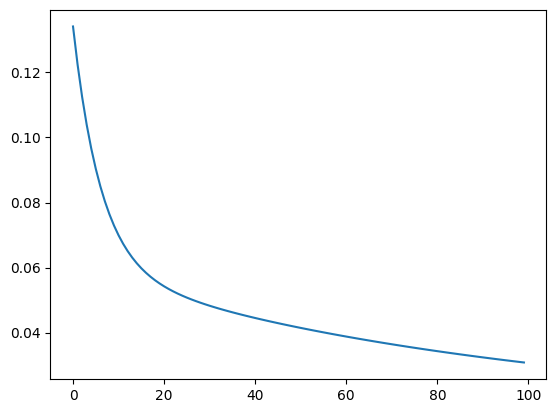

In [ ]:
plt.plot(my_model.error_list);

In [ ]:
my_model = MyLinearRegression(learning_rate=0.2, iterations=500)
my_model.fit(X_train, y_train)

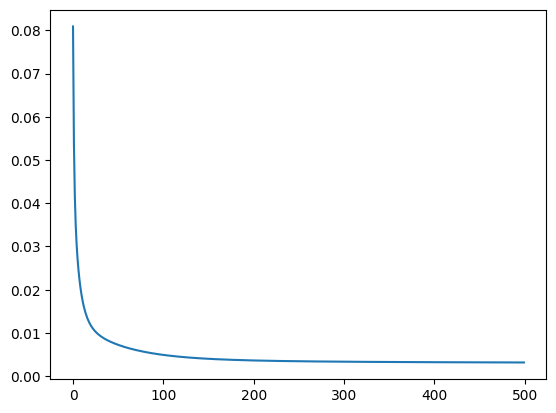

In [ ]:
plt.plot(my_model.error_list);

In [ ]:
my_model.W

,0
year,0.142341
km_driven,-0.021242
mileage,-0.051168
engine,0.095223
max_power,0.135828
age,-0.182428
make,0.152539
model,0.760813
Individual,-0.007148
Trustmark Dealer,-0.006946


In [ ]:
my_model.w0

-0.040087236126798736

In [ ]:
# train performance
my_model.score(X_train, y_train)

0.9423785754337994

In [ ]:
X_test.shape

(3964, 17)

In [ ]:
y_test.shape

(3964,)

In [ ]:
y_test = y_test.values.reshape(len(y_test), 1)
y_test.shape

(3964, 1)

In [ ]:
# test performance
my_model.score(X_test, y_test)

0.9465591922357328

In [ ]:
n, d = X_train.shape
r2 = my_model.score(X_train, y_train)

In [ ]:
something = (1-r2)*(n-1)/(n-d-1)
adj_r2 = 1 - something
print(adj_r2)

0.942316726449229


In [ ]:
d = d+1000
something = (1-r2)*(n-1)/(n-d-1)
adj_r2 = 1 - something
print(adj_r2)

0.938429189479909


In [ ]:
import statsmodels.api as sm

In [ ]:
# Statmodels default is without intercept, to add intercept we need to add constant.
X_sm = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_sm)
results = model.fit()


# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.715e+04
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:21:26   Log-Likelihood:                 23560.
No. Observations:               15856   AIC:                        -4.709e+04
Df Residuals:                   15839   BIC:                        -4.696e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.81e+11   8.94e+10  

In [ ]:
results.predict(X_sm)

5662     0.171435
4556     0.511701
7094     0.324512
1441     0.277232
17079    0.091621
           ...   
11284    0.118166
11964    0.223464
5390     0.200568
860      0.360407
15795    0.261095
Length: 15856, dtype: float64

In [ ]:
# Linear Regression

def predict(X,weights):
    return np.dot(X,weights)

def error(X,y,weights):
    yp = predict(X,weights)
    e = np.mean((y-yp)**2)
    return e

def gradient(X,y,weight):
    yp = predict(X,weight)
    grad = np.dot(X.T,(yp - y))
    return grad

def train(X,y,learning_rate = 0.001,max_iters=100):

    d = X.shape[1]
    weights = np.random.randn(d,1)
    error_list = []

    for i in range(max_iters):
        e = error(X,y,weights)
        error_list.append(e)

        #Gradient descent
        grad = gradient(X,y,weights)
        weights = weights - learning_rate*grad

    plt.plot(error_list)
    return weights

def r2_score(Y,Yp):
    num = np.sum((Y-Yp)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

# Assumptions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 66.0MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
# target encoding
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('selling_price', axis=1), df['selling_price'], test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5662,2013.0,80000,20.54,1598.0,103.6,10.0,5.540306,3.775000,1,0,1,0,0,0,1,1,0
4556,2010.0,97547,16.07,1995.0,181.0,13.0,17.349017,10.923750,0,0,1,0,0,0,0,1,0
7094,2018.0,74000,27.39,1248.0,74.0,5.0,4.684721,6.882857,1,0,1,0,0,0,1,1,0
1441,2019.0,15000,23.84,1199.0,84.0,4.0,4.381194,5.612500,1,0,0,0,0,1,1,1,0
17079,2008.0,110000,13.50,1799.0,130.0,15.0,5.979902,2.840588,1,0,0,0,0,1,1,1,0


In [ ]:
y_train.head()

5662     5.25
4556     8.25
7094     7.50
1441     5.70
17079    4.00
Name: selling_price, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape

((15856, 17), (15856,))

In [ ]:
X_test.shape, y_test.shape

((3964, 17), (3964,))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# variance_inflation_factor(X_t.values, 4)

In [ ]:
X_t = pd.DataFrame(X_train, columns=df.columns[1:])

vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,206.91
5,age,20.69
13,Petrol,16.79
10,Diesel,15.87
16,>5,13.32
15,5,12.11
3,engine,6.33
7,model,6.14
4,max_power,5.11
6,make,3.26


In [ ]:
# X_t
X_t.drop(columns = ['year'], inplace = True)

In [ ]:
X_t.head()

,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.053808,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.065625,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.049768,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.010034,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.074012,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,5,50.93
2,engine,50.53
3,max_power,27.37
9,Diesel,26.81
12,Petrol,22.47
1,mileage,22.44
6,model,16.74
5,make,11.56
15,>5,10.89
13,Manual,8.81


In [ ]:
X_t.drop(columns = ['5'], inplace = True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,engine,47.50
3,max_power,27.09
9,Diesel,23.35
12,Petrol,16.87
1,mileage,16.54
6,model,16.52
5,make,11.56
4,age,8.63
13,Manual,8.61
0,km_driven,3.63


In [ ]:
X_t.drop(columns = ['engine'], inplace = True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Diesel,20.41
2,max_power,17.02
5,model,16.35
1,mileage,16.22
11,Petrol,15.32
4,make,11.43
12,Manual,8.37
3,age,8.27
0,km_driven,3.57
6,Individual,1.79


In [ ]:
X_t.drop(columns = ['Diesel'], inplace = True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,max_power,16.21
5,model,15.60
4,make,11.43
1,mileage,10.32
11,Manual,7.89
3,age,7.46
0,km_driven,3.53
10,Petrol,2.14
6,Individual,1.77
12,>5,1.64


In [ ]:
X_t.head()

,km_driven,mileage,max_power,age,make,model,Individual,Trustmark Dealer,Electric,LPG,Petrol,Manual,>5
0,0.053808,0.142586,0.158776,0.275862,0.236566,0.167659,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.065625,0.104052,0.283414,0.379310,0.823407,0.515065,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.049768,0.201638,0.111111,0.103448,0.194048,0.318691,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.010034,0.171034,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.074012,0.081897,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_t, y_train)

LinearRegression()

In [ ]:
model.score(X_t, y_train)

0.9451898250472941

$$y_i - \hat{y}_i$$

In [ ]:
y_hat = model.predict(X_t)

In [ ]:
errs = y_train - y_hat
errs[:5]

5662     1.421292
4556    -2.643201
7094     0.619897
1441    -0.250233
17079    1.838122
Name: selling_price, dtype: float64

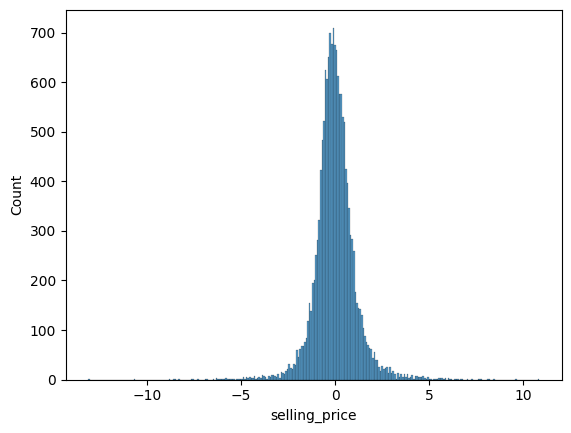

In [ ]:
import seaborn as sns
sns.histplot(errs);

In [ ]:
from scipy import stats

res = stats.shapiro(errs)
res.statistic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8991931676864624

In [ ]:
# close to 1

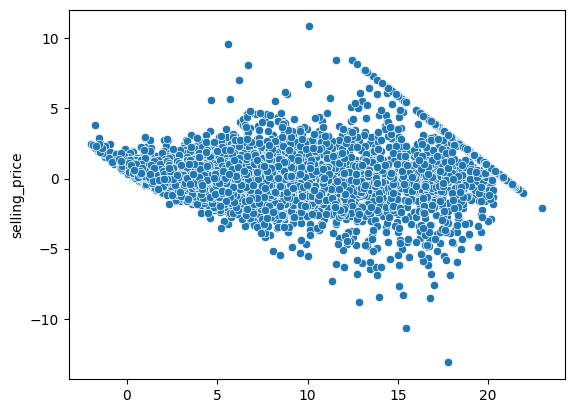

In [ ]:
sns.scatterplot(x=y_hat, y =errs)
plt.show();